<a href="https://colab.research.google.com/github/flyingyizi/tmr-group-notes/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# concepts of k-Nearest Neighbors
It works like this: we have an existing set of example data, our training set. We have labels for all of this data—we know what class each piece of the data should fall into. When we're given a new piece of data without a label, we compare that new piece of data to the existing data, every piece of existing data. We then take the most similar pieces of data (the nearest neighbors) and look at their labels. We look at the top k most similar pieces of data from our known dataset; this is where the **k** comes from. (k is an integer and it's usually less than 20.) Lastly, we take a majority vote from the k most similar pieces of data, and the majority is the new class we assign to the data we
were asked to classify.

## training examples（datasets and labels）

Here we have four pieces of data. Each piece of data has two attributes or features, things we know about it. In the group matrix each row is a different piece of data. Think of it as a different measurement or entry in some sort of log. As humans, we can visualize things in one, two, or sometimes three dimensions, but that’s about the limit of our brains; to keep things easy to visualize, we’ll use only two features for each data point.
The label’s vector carries the labels we’ve given to each of the data points. There should be as many items in this vector as there are rows in the group matrix. We assigned the data point (1,1.1) to the class A, and similarly we assigned the data point (0,0.1) to the class B.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def createDataSet() :
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return (group, labels)
group,labels = createDataSet()

#terminal show
group,labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

The values in this example are arbitrarily chosen for the purpose of illustration, and the axes are unlabeled. The four data points with class labels are plotted in figure.

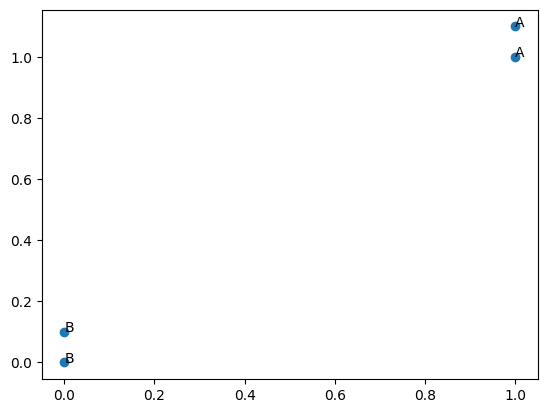

In [46]:
x = group[:,0]
y = group[:,1]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

# kNN classification algorithm

using training examples（datasets and labels）, to classify one piece of data called *inX*. Pseudocode for this function would look like this:

For every point in our training examples:

1. *calculate the distance between inX and the current point*
2. *sort the distances in increasing order*
3. *take k items with lowest distances to inX*
4. *find the majority class among these items*
5. *return the majority class as our prediction for the class of inX*

## python implement

In [51]:
'''
kNN: k Nearest Neighbors algorithm

Input:  inX: vector to compare to existing dataset (1xN)
     dataSet: size m data set of known vectors (NxM)
     labels: data set labels (1xM vector)
     k: number of neighbors to use for comparison (should be an odd number)

Output:     the most popular class label
'''
import operator
from os import listdir

def classify0(inX, dataSet, labels, k):
    # distance calculation using the Euclidian distance
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    #voting with lowest k distances
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # Finally, return the label of the item occurring the most frequently
    return sortedClassCount[0][0]

To predict the class, type the following text, The result should be B. Try to change the [0,0] entry to see how the answer changes.

Congratulations, you just made your first classifier! You can do a lot with this simple classifier. Things will only get easier from here on out.

In [53]:
classify0([0,0], group, labels, 3)

'B'

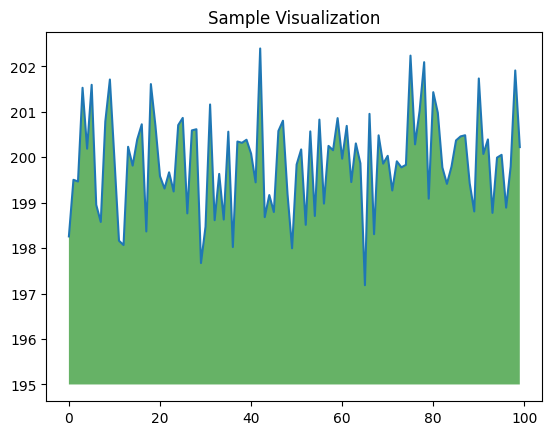

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()